In [4]:
from models import *
from algoritms.landmarks import *
from import_dataset import *
from algoritms import *
import random
import time

In [5]:
my_graph = ca_undirected('datasets-2/CA-GrQc.txt')
wc = weak_conns(my_graph)

my_graph = sorted(split_graph(my_graph, wc), key=lambda x: x.num_vertices)[-1]

In [13]:
START_VER, END_VER = random.sample(tuple(my_graph.get_all_vertices()), 2)
print(START_VER, END_VER)

t = time.time_ns()
tree = get_shortest_path_lengths(my_graph, START_VER, my_graph.get_all_vertices())
t = time.time_ns() - t

exact_len = tree[END_VER]
print(f"Exact method: {t} s. - {exact_len}")

def foo(implementation, count, method):
    land = implementation(my_graph, count, method)
    return land.distance(START_VER, END_VER)

9736 9721
Exact method: 10281800 s. - 4


In [ ]:
my_graph.num_vertices

# Basic

In [14]:
LANDMARKS_NUM = 3

x_landmarks = []

y_basic_random_time = []
y_basic_degree_time = []
y_basic_coverage_time = []

y_basic_random_r = []
y_basic_degree_r = []
y_basic_coverage_r = []

for LANDMARKS_NUM in (i**2 for i in range(20)):
    x_landmarks.append(LANDMARKS_NUM)

    print(">>> LANDMARKS_NUM", LANDMARKS_NUM)

    total_time = 0
    total_path = 0
    for i in range(10):
        t = time.time_ns()
        path = foo(LandmarksBasic, LANDMARKS_NUM, SelectLandmarksMethod.RANDOM)
        t = time.time_ns() - t

        total_time += t
        total_path += path

    t = total_time / 10
    path = total_path / 10

    y_basic_random_time.append(t)
    y_basic_random_r.append(path-exact_len)


    print(f"BASIC, random method: {t} s. {path}")

    t = time.time_ns()
    path = foo(LandmarksBasic, LANDMARKS_NUM, SelectLandmarksMethod.MAX_DEGREE)
    t = time.time_ns() - t

    y_basic_degree_time.append(t)
    y_basic_degree_r.append(path-exact_len)

    print(f"BASIC, max degree method: {t} s. {path}")

    total_time = 0
    total_path = 0
    for i in range(10):
        t = time.time_ns()
        path = foo(LandmarksBasic, LANDMARKS_NUM, SelectLandmarksMethod.BEST_COVERAGE)
        t = time.time_ns() - t

        total_time += t
        total_path += path

    t = total_time / 10
    path = total_path / 10

    y_basic_coverage_time.append(t)
    y_basic_coverage_r.append(path-exact_len)

    print(f"BASIC, best coverage: {t} s. {path}")

>>> LANDMARKS_NUM 0
BASIC, random method: 0.0 s. inf
BASIC, max degree method: 15635600 s. inf
BASIC, best coverage: 872374260.0 s. inf
>>> LANDMARKS_NUM 1
BASIC, random method: 5260250.0 s. 10.7
BASIC, max degree method: 10209100 s. 5
BASIC, best coverage: 833926940.0 s. 6.0
>>> LANDMARKS_NUM 4
BASIC, random method: 21364850.0 s. 8.5
BASIC, max degree method: 20285200 s. 4
BASIC, best coverage: 922650940.0 s. 5.1
>>> LANDMARKS_NUM 9
BASIC, random method: 48729190.0 s. 7.0
BASIC, max degree method: 50593900 s. 4
BASIC, best coverage: 1038353820.0 s. 4.4
>>> LANDMARKS_NUM 16
BASIC, random method: 85999830.0 s. 6.7
BASIC, max degree method: 89073800 s. 4
BASIC, best coverage: 1164072230.0 s. 4.6
>>> LANDMARKS_NUM 25
BASIC, random method: 132162450.0 s. 6.6
BASIC, max degree method: 131830400 s. 4
BASIC, best coverage: 1279493670.0 s. 4.1
>>> LANDMARKS_NUM 36
BASIC, random method: 187245030.0 s. 6.3
BASIC, max degree method: 182572100 s. 4
BASIC, best coverage: 1372563770.0 s. 4.2
>>> LAN

 Soc wiki

In [ ]:
from matplotlib import pyplot as plt

plt.plot(x_landmarks, y_basic_random_time, label="random")
plt.plot(x_landmarks, y_basic_degree_time, label="max degree")
plt.plot(x_landmarks, y_basic_coverage_time, label="best coverage")
plt.title("Затраченное время (soc-wiki)")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("time, ns")
plt.legend()
plt.show()

In [ ]:
plt.plot(x_landmarks, y_basic_random_r, label="random")
plt.plot(x_landmarks, y_basic_degree_r, label="max degree")
plt.plot(x_landmarks, y_basic_coverage_r, label="best coverage")
plt.legend()
plt.title("Размер ошибки")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("error")
plt.show()

# CA

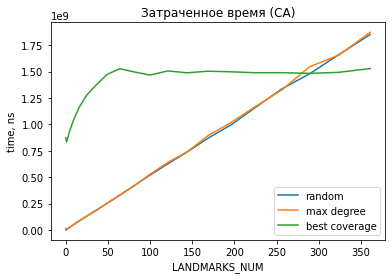

In [15]:
from matplotlib import pyplot as plt

plt.plot(x_landmarks, y_basic_random_time, label="random")
plt.plot(x_landmarks, y_basic_degree_time, label="max degree")
plt.plot(x_landmarks, y_basic_coverage_time, label="best coverage")
plt.title("Затраченное время (CA)")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("time, ns")
plt.legend()
plt.show()

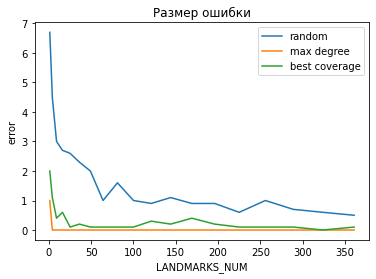

In [16]:
plt.plot(x_landmarks, y_basic_random_r, label="random")
plt.plot(x_landmarks, y_basic_degree_r, label="max degree")
plt.plot(x_landmarks, y_basic_coverage_r, label="best coverage")
plt.legend()
plt.title("Размер ошибки")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("error")
plt.show()

# LCA

In [17]:
LANDMARKS_NUM = 3

x_landmarks = []

y_lca_random_time = []
y_lca_degree_time = []
y_lca_coverage_time = []

y_lca_random_r = []
y_lca_degree_r = []
y_lca_coverage_r = []

for LANDMARKS_NUM in (i**2 for i in range(20)):
    x_landmarks.append(LANDMARKS_NUM)

    print(">>> LANDMARKS_NUM", LANDMARKS_NUM)

    total_time = 0
    total_path = 0
    for i in range(10):
        t = time.time_ns()
        path = foo(LandmarksLCA, LANDMARKS_NUM, SelectLandmarksMethod.RANDOM)
        t = time.time_ns() - t

        total_time += t
        total_path += path

    t = total_time / 10
    path = total_path / 10

    y_lca_random_time.append(t)
    y_lca_random_r.append(path-exact_len)


    print(f"BASIC, random method: {t} s. {path}")

    t = time.time_ns()
    path = foo(LandmarksLCA, LANDMARKS_NUM, SelectLandmarksMethod.MAX_DEGREE)
    t = time.time_ns() - t

    y_lca_degree_time.append(t)
    y_lca_degree_r.append(path-exact_len)

    print(f"BASIC, max degree method: {t} s. {path}")

    total_time = 0
    total_path = 0
    for i in range(10):
        t = time.time_ns()
        path = foo(LandmarksLCA, LANDMARKS_NUM, SelectLandmarksMethod.BEST_COVERAGE)
        t = time.time_ns() - t

        total_time += t
        total_path += path

    t = total_time / 10
    path = total_path / 10

    y_lca_coverage_time.append(t)
    y_lca_coverage_r.append(path-exact_len)

    print(f"BASIC, best coverage: {t} s. {path}")

>>> LANDMARKS_NUM 0
BASIC, random method: 0.0 s. inf
BASIC, max degree method: 0 s. inf
BASIC, best coverage: 1098617360.0 s. inf
>>> LANDMARKS_NUM 1
BASIC, random method: 6046480.0 s. 9.1
BASIC, max degree method: 0 s. 5
BASIC, best coverage: 999966140.0 s. 7.5
>>> LANDMARKS_NUM 4
BASIC, random method: 21108630.0 s. 8.3
BASIC, max degree method: 22569500 s. 4
BASIC, best coverage: 949234810.0 s. 4.8
>>> LANDMARKS_NUM 9
BASIC, random method: 44620900.0 s. 6.8
BASIC, max degree method: 51086100 s. 4
BASIC, best coverage: 1060643760.0 s. 4.7
>>> LANDMARKS_NUM 16
BASIC, random method: 90446600.0 s. 6.5
BASIC, max degree method: 101458300 s. 4
BASIC, best coverage: 1173496740.0 s. 4.4
>>> LANDMARKS_NUM 25
BASIC, random method: 127613050.0 s. 5.6
BASIC, max degree method: 121883100 s. 4
BASIC, best coverage: 1313728690.0 s. 4.3
>>> LANDMARKS_NUM 36
BASIC, random method: 188261880.0 s. 5.5
BASIC, max degree method: 194174600 s. 4
BASIC, best coverage: 1401538630.0 s. 4.2
>>> LANDMARKS_NUM 49

 wiki

In [ ]:
from matplotlib import pyplot as plt

plt.plot(x_landmarks, y_lca_random_time, label="random")
plt.plot(x_landmarks, y_lca_degree_time, label="max degree")
plt.plot(x_landmarks, y_lca_coverage_time, label="best coverage")
plt.title("Затраченное время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("time, ns")
plt.legend()
plt.show()

In [ ]:
plt.plot(x_landmarks, y_lca_random_r, label="random")
plt.plot(x_landmarks, y_lca_degree_r, label="max degree")
plt.plot(x_landmarks, y_lca_coverage_r, label="best coverage")
plt.legend()
plt.title("Размер ошибки")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("error")
plt.show()

# CA

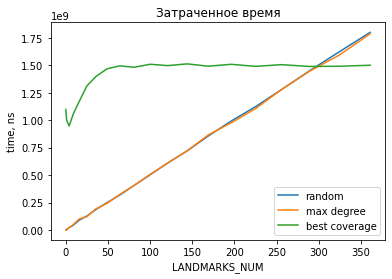

In [18]:
from matplotlib import pyplot as plt

plt.plot(x_landmarks, y_lca_random_time, label="random")
plt.plot(x_landmarks, y_lca_degree_time, label="max degree")
plt.plot(x_landmarks, y_lca_coverage_time, label="best coverage")
plt.title("Затраченное время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("time, ns")
plt.legend()
plt.show()

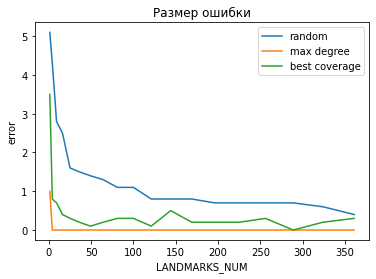

In [19]:
plt.plot(x_landmarks, y_lca_random_r, label="random")
plt.plot(x_landmarks, y_lca_degree_r, label="max degree")
plt.plot(x_landmarks, y_lca_coverage_r, label="best coverage")
plt.legend()
plt.title("Размер ошибки")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("error")
plt.show()

# Comapre
## wiki

In [ ]:
plt.plot(x_landmarks, y_lca_degree_time, label="LCA")
plt.plot(x_landmarks, y_basic_degree_time, label="BASIC")
plt.legend()
plt.title("Время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

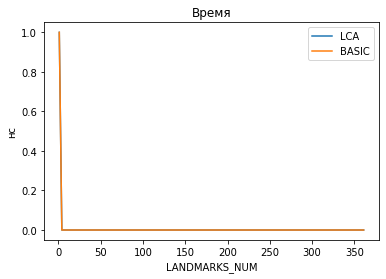

In [26]:
plt.plot(x_landmarks[1:], y_lca_degree_r[1:], label="LCA")
plt.plot(x_landmarks[1:], y_basic_degree_r[1:], label="BASIC")
plt.legend()
plt.title("Время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

## CA

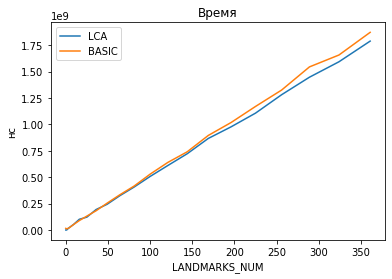

In [20]:
plt.plot(x_landmarks, y_lca_degree_time, label="LCA")
plt.plot(x_landmarks, y_basic_degree_time, label="BASIC")
plt.legend()
plt.title("Время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

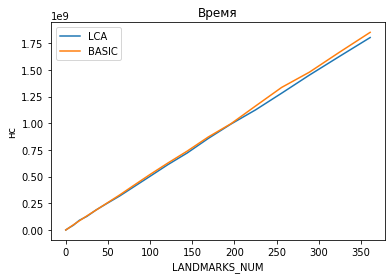

In [21]:
plt.plot(x_landmarks, y_lca_random_time, label="LCA")
plt.plot(x_landmarks, y_basic_random_time, label="BASIC")
plt.legend()
plt.title("Время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

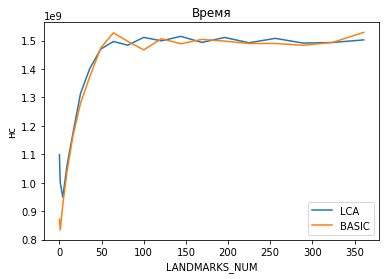

In [22]:
plt.plot(x_landmarks, y_lca_coverage_time, label="LCA")
plt.plot(x_landmarks, y_basic_coverage_time, label="BASIC")
plt.legend()
plt.title("Время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

In [24]:
x_landmarks_num = []
y_random = []
y_degree = []
y_coverage = []

for LANDMARKS_NUM in (i**2 for i in range(20)):
    print(LANDMARKS_NUM)
    x_landmarks_num.append(LANDMARKS_NUM)

    total_time = 0

    total_time = 0
    for _ in range(10):
        t = time.time_ns()
        select_landmarks(my_graph, LANDMARKS_NUM, SelectLandmarksMethod.RANDOM)
        t = time.time_ns() - t

        total_time += t
    t = total_time / 10

    y_random.append(t)

    t = time.time_ns()
    select_landmarks(my_graph, LANDMARKS_NUM, SelectLandmarksMethod.MAX_DEGREE)
    t = time.time_ns() - t

    y_degree.append(t)

    total_time = 0
    for _ in range(10):
        t = time.time_ns()
        select_landmarks(my_graph, LANDMARKS_NUM, SelectLandmarksMethod.BEST_COVERAGE)
        t = time.time_ns() - t

        total_time += t
    t = total_time / 10

    y_coverage.append(t)


0
1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361


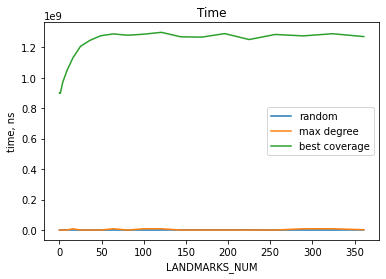

In [25]:
plt.plot(x_landmarks_num, y_random, label="random")
plt.plot(x_landmarks_num, y_degree, label="max degree")
plt.plot(x_landmarks_num, y_coverage, label="best coverage")
plt.legend()
plt.title("Time")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("time, ns")
plt.show()